In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import pandas as pd
pd.set_option('display.max_rows', 5)

df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
...,...,...,...,...,...,...,...
75%,668.5,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.0,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df=df.drop(['PassengerId','Name'],axis=1)


In [62]:
male_survived_df = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
female_survived_df = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]


men_survived = len(male_survived_df)
women_survived = len(female_survived_df)

print("Number of men who survived:", men_survived)
print("Number of women who survived:", women_survived)

total_men = len(df[df['Sex'] == 'male'])
total_women=len(df[df['Sex']=='female'])

proportion_men_survived=men_survived/total_men
proportion_women_survived=women_survived/total_women

print("Proportion of men who survived:",proportion_men_survived)
print("Proportion of women who survived:",proportion_women_survived)



Number of men who survived: 109
Number of women who survived: 233
Proportion of men who survived: 0.18890814558058924
Proportion of women who survived: 0.7420382165605095


In [63]:
children_under_18_survived=len(df[(df['Age']<18)&df['Survived']==1])
total_children=len(df[df['Age']<18])
proportion_children_survived=children_under_18_survived/total_children

print("Proportion of children whosurvived: ",proportion_children_survived)

Proportion of children whosurvived:  0.5398230088495575


In [64]:
fare_above_100=len(df[df['Fare']>99])
fare_above_100_survived=len(df[(df['Fare']>100) & df['Survived']==1])
prop_fare_above_100_survived=fare_above_100_survived/fare_above_100

print("The proportion of those who paid fare above 100 and survived",prop_fare_above_100_survived)


The proportion of those who paid fare above 100 and survived 0.7358490566037735


Text(0.5, 8.95999999999998, 'Sex')

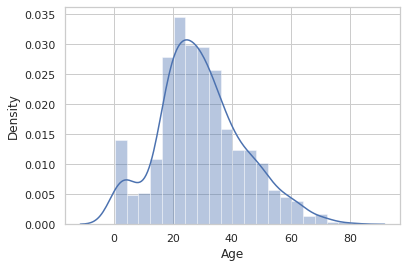

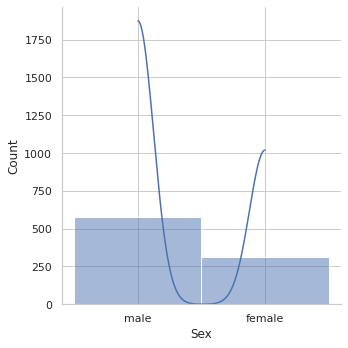

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

sns.distplot(df['Age'],kde=True)
plt.xlabel("Age")

sns.displot(df['Sex'],kde=True)
plt.xlabel("Sex")


Text(0.5, 0, 'Fare')

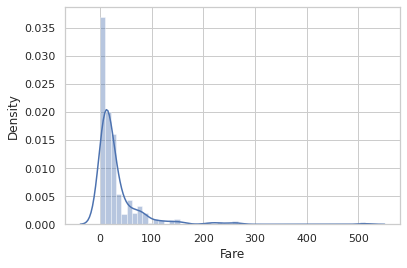

In [66]:
sns.distplot(df['Fare'],kde=True)
plt.xlabel("Fare")


In [67]:
from scipy.stats import skew

skewness = skew(df['Fare'])
print(f"Skewness before transformation: {skewness}")

import numpy as np

df['Fare'] = np.log1p(df['Fare'])
skewness_after = skew(df['Fare'])

print(f"Skewness after transformation: {skewness_after}")



Skewness before transformation: 4.7792532923723545
Skewness after transformation: 0.39426283638993376


Text(0.5, 0, 'Fare')

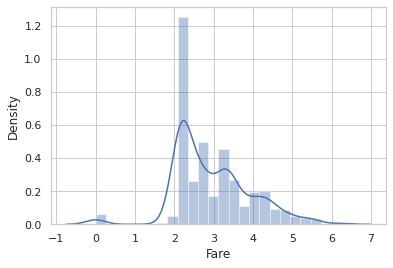

In [68]:
sns.distplot(df['Fare'],kde=True)
plt.xlabel("Fare")


In [86]:
from scipy.stats import kurtosis

column_kurtosis = kurtosis(df['Fare'])

print(f"Kurtosis: {column_kurtosis}")

column_excess_kurtosis = kurtosis(df['Fare'], fisher=True)

print(f"Excess Kurtosis: {column_excess_kurtosis}")


Kurtosis: 0.9639464598718419
Excess Kurtosis: 0.9639464598718419


Text(0.5, 1.0, 'Scatterplot of Fare Against Age')

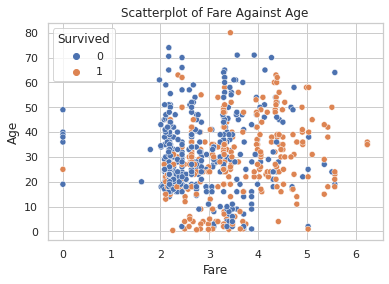

In [69]:
sns.scatterplot(x=df['Fare'],y=df['Age'],hue=df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatterplot of Fare Against Age')


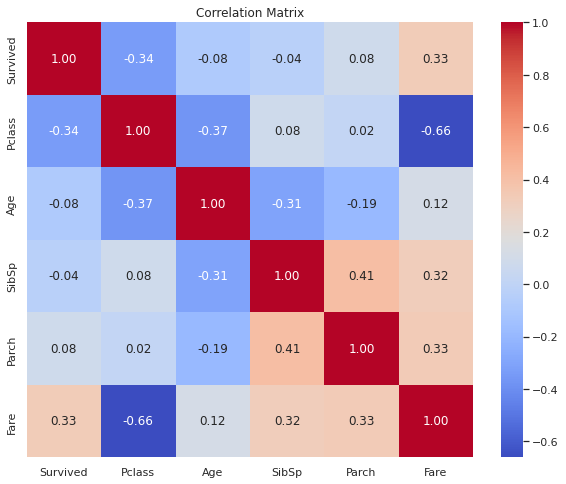

In [70]:
correlation_matrix=df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [71]:
y_full=df['Survived']
df=df.drop('Survived',axis=1)
df['age_class_fare']=(df['Pclass']*df['Fare'])/df['Age']

In [72]:
df.isnull().sum()

Pclass              0
Sex                 0
                 ... 
Embarked            2
age_class_fare    177
Length: 10, dtype: int64

In [73]:
numerical_cols=df.select_dtypes(exclude='object')
categorical_cols=df.select_dtypes(include='object')
categorical_cols.head()


,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


In [74]:
categorical_cols['Cabin'].nunique()

147

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


numerical_imputer=SimpleImputer(strategy='mean')
categorical_imputer=SimpleImputer(strategy='most_frequent')

numerical=pd.DataFrame(numerical_imputer.fit_transform(numerical_cols),columns=numerical_cols.columns)
numerical=pd.DataFrame(scaler.fit_transform(numerical),columns=numerical.columns)
categorical=pd.DataFrame(categorical_imputer.fit_transform(categorical_cols),columns=categorical_cols.columns)


In [76]:
Categorical = categorical.drop(['Ticket', 'Cabin'], axis=1)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
categorical_final = pd.DataFrame(encoder.fit_transform(Categorical).toarray(), columns=encoder.get_feature_names(Categorical.columns))


In [77]:
df=pd.concat([numerical,categorical_final],axis=1)
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(df,y_full,test_size=0.15,random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint,uniform




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_grid = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
}

rf_classifier = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(
    rf_classifier, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_classifier2 = grid_search.best_estimator_


[CV] END criterion=entropy, max_depth=70, max_features=None, min_samples_split=5, n_estimators=700; total time=   3.7s


In [ ]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
param_dist = {
    'n_estimators': np.arange(100, 1001, 100), 
    'learning_rate': [0.01,0.05,0.1],
    'max_depth': np.arange(3, 11),  
    'min_child_weight': np.arange(1, 11),  
    'subsample': np.arange(0.7, 1.0, 0.1),  
    'colsample_bytree': np.arange(0.7, 1.0, 0.1),  
    'gamma': [0, 0.1, 0.2],  
    'reg_alpha': [0, 0.01, 0.1], 
    'reg_lambda': [0, 0.01, 0.1], 
}

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'subsample': 0.8999999999999999, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [ ]:
y_pred1=best_rf_classifier.predict(X_valid)
#y_pred2=best_xgb_model.predict(X_valid)
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_true=y_valid,y_pred=y_pred1))
#print(mean_absolute_error(y_pred=y_pred2,y_true=y_valid))

0.17164179104477612


In [ ]:

test_df = pd.read_csv('test.csv')
predictions=pd.DataFrame()
predictions['PassengerId'] = test_df['PassengerId']
test_df['age_class_fare']=(test_df['Pclass']*test_df['Fare'])/test_df['Age']
num_col=test_df.select_dtypes(exclude='object')
cat_cols=test_df.select_dtypes(include='object')
num_col=pd.DataFrame(numerical_imputer.fit_transform(num_col),columns=num_col.columns)
num_col=pd.DataFrame(scaler.fit_transform(num_col),columns=num_col.columns)
cat_cols=pd.DataFrame(categorical_imputer.fit_transform(cat_cols),columns=cat_cols.columns)
Cat=cat_cols.drop(['Name','Cabin','Ticket'],axis=1)
cat_final = pd.DataFrame(encoder.fit_transform(Cat).toarray(), columns=encoder.get_feature_names(Cat.columns))
test_df=pd.concat([num_col,cat_final],axis=1)
test_df=test_df.drop('PassengerId',axis=1)
predictions['Survived']=best_rf_classifier.predict(test_df)


In [ ]:

path='predictions.csv'
predictions.to_csv(path,index=False)
